##  Regression  effect in case of Outliers.

 And Visualizing best fit linear regression line for different scenarios

In [ ]:
#Importing necessary packages.  
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.linear_model import SGDRegressor

In [ ]:
import numpy as np
import scipy as sp
import scipy.optimize

#This function "angles_in_ellipse" create angles in epplise.
def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

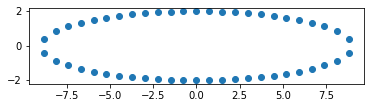

In [ ]:
a = 2
b = 9
n = 50
#Creating and Plotting the points in ellipse format for checking the outlier effect.
phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()


# Algorithm: 

##### for each regularizer:
    for each outlier:
        add the outlier to the data
        fit the linear regression to the updated data
        get the hyper plane
        plot the hyperplane along with the data points


In [ ]:
#using the previous function draw_line to plot the separating hyperplabe.
def draw_line(coef,intercept, mi, ma):
  points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
  plt.plot(points[:,0], points[:,1],color='green',linestyle='dashed')

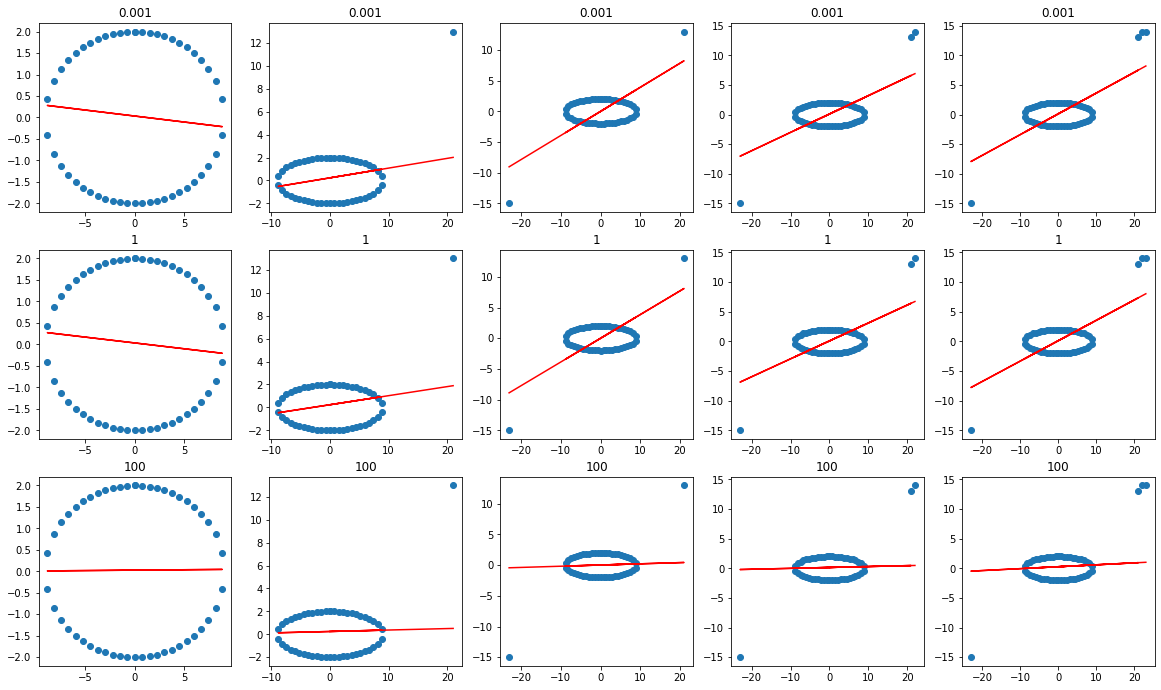

In [ ]:
#declaring the hyperparamters.
hypers = [0.001,1,100]
#set the plt size to 20,16
plt.figure(figsize = (20,16))
#plotting graph for each hyper_parameter.
for j,lr in enumerate(hypers):
    #declaring the outlier_points.
    outlier_points = [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)]
    #creating the train points X,Y.
    X = b * np.sin(phi)
    Y = a * np.cos(phi)
    #appending each outlier one by by through for loop and plotting the separating hyperplane.
    for c,k in enumerate(range(5*j+1, 5*(j+1)+1)):
        X= np.append(X,outlier_points[c][0])
        Y= np.append(Y,outlier_points[c][1])
        #training the model after updating the outliers.
        clf = SGDRegressor(alpha = lr, random_state=12)
        clf.fit(X.reshape(-1,1), Y)
        Y_pred =clf.predict(X.reshape(-1,1))
        plt.subplot(4,5,k)
        plt.scatter(X,Y)
        plt.plot(X,Y_pred, color ='red')
        plt.title(str(lr))
plt.show()

##observation:
######1. The hyper plane deviates when there is a outlier in the data.
######2. The model is prone to outliers.
######3. The model performs good when the data ( Including the outliers) are in symmentry
######4. when the outliers are more in data the hyper plane tends to move towards the side where majaroity of outliers are present.